# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


С данными всё в порядке, пропусков нет, тип данных соответствует условию и значениям

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [4]:
df.describe(include='all').fillna('-').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,100000,3,Female,58552,-,-,-,-,-,-,-
age,100000.0,-,-,-,41.885856,22.51684,0.08,24.0,43.0,60.0,80.0
hypertension,100000.0,-,-,-,0.07485,0.26315,0.0,0.0,0.0,0.0,1.0
heart_disease,100000.0,-,-,-,0.03942,0.194593,0.0,0.0,0.0,0.0,1.0
smoking_history,100000,6,No Info,35816,-,-,-,-,-,-,-
bmi,100000.0,-,-,-,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,-,-,-,5.527507,1.070672,3.5,4.8,5.8,6.2,9.0
blood_glucose_level,100000.0,-,-,-,138.05806,40.708136,80.0,100.0,140.0,159.0,300.0
diabetes,100000.0,-,-,-,0.085,0.278883,0.0,0.0,0.0,0.0,1.0


**Вывод:**
- У нас три уникальных значения __gender__, нужно обязательно разобраться с этим столбцом и посмотреть его уникальные значения, а так, на первый взгляд, преобладают девушки, но не сильно
- Средний возраст 42 года, в нашем датасете присутствует информация и о самых маленьких пациентах, которым не исполнился год
- Очень малое число болеют гипертонией и сердечными заболеваниями(7% и 4% соответственно от общего количества)
- Среднее количество жира в организме у пациентов - 27
- Средний уровень гемоглобина - 5,5
- Средний уровень глюкозы в крови - 138
- Пациенты, болеющие диабетом составляют ~ 9%
- У всех числовых признаков среднее и медиана практически совпадают, значит выбросов у нас как таковых нет

In [5]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Есть значение __other__, сейчас посмотрю информацию о этих значениях 

In [6]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


Все "другие" клиенты не болели ни гипертонией, ни сердечными заболеваниями, в большинстве случаев не курили, почти все имеют допустимый уровень жира и, соотвественно, не болели диабетом

Предлагаю удалить данные по этим пациентам, так как их, во-первых, очень мало по сравнению с общим числом, во-вторых, особой информативности они не носят, всё очень очевидно

In [7]:
df_modified = df.copy()

In [8]:
df_modified = df_modified.drop(df_modified[df_modified['gender'] == 'Other'].index)
df_modified.shape

(99982, 9)

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [9]:
df.duplicated().astype(int).sum()

np.int64(3854)

Видим, что у нас 3854 дубликата, удалим их

In [10]:
df_modified.drop_duplicates(inplace=True)
df_modified.shape

(96128, 9)

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

In [11]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


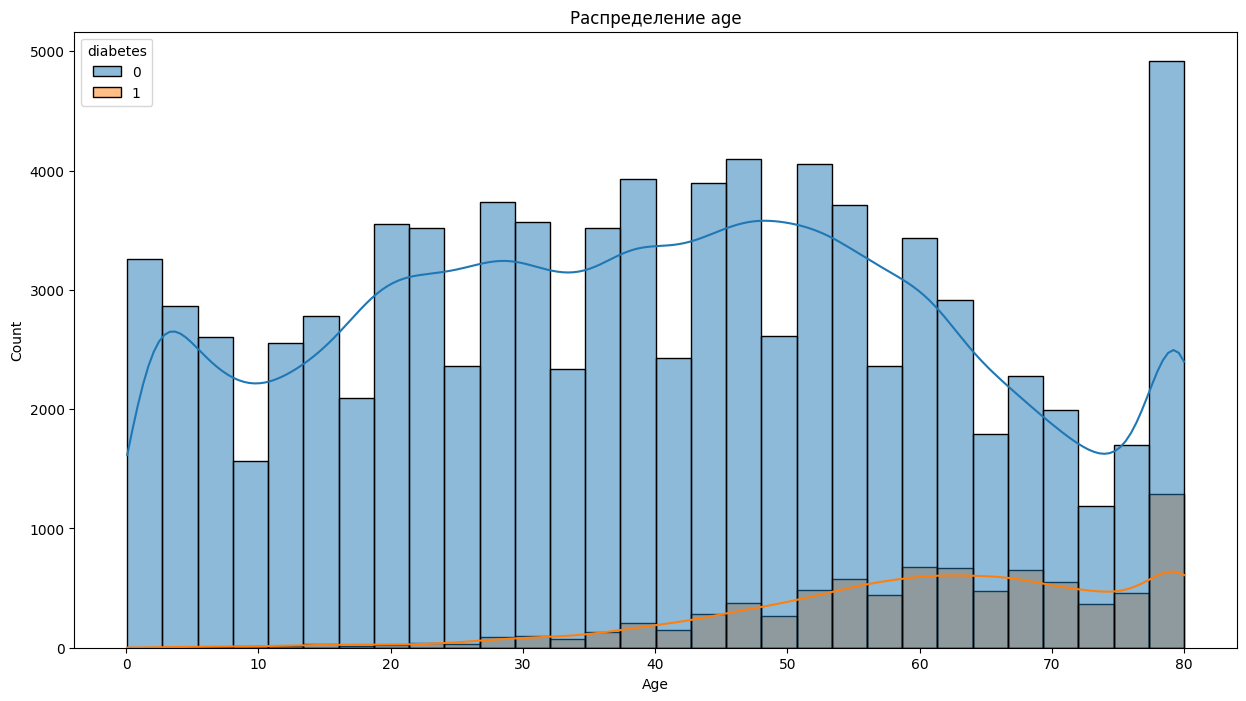

In [12]:
plt.figure(figsize=(15, 8))
sns.histplot(df_modified, x='age', bins=30, hue='diabetes', kde=True)
plt.title('Распределение age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Вывод:**
Диабетом начинают заболевать с ~ 30 лет, а его пик происходит на престарелый возраст ~ 80 лет, чаще всего диабетом болеют люди в возрасте от 40 до 80 лет

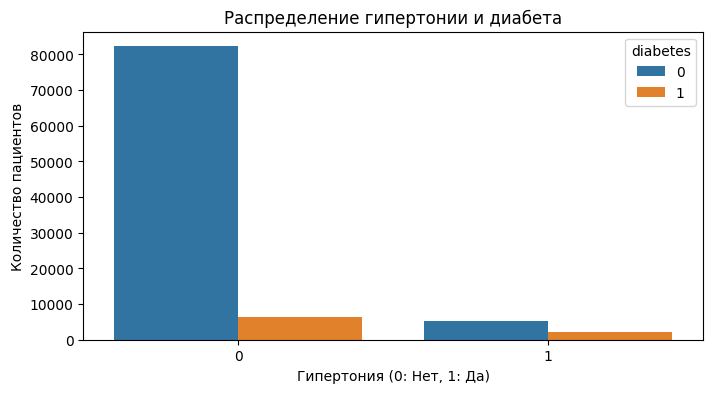

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_modified, x='hypertension', hue='diabetes')
plt.title('Распределение гипертонии и диабета')
plt.xlabel('Гипертония (0: Нет, 1: Да)')
plt.ylabel('Количество пациентов')
plt.show()

In [30]:
diabetes_rate_no_hyper = df_modified[df_modified['hypertension'] == 0]['diabetes'].mean()
diabetes_rate_with_hyper = df_modified[df_modified['hypertension'] == 1]['diabetes'].mean()
print(f"Доля диабетиков без гипертонии: {diabetes_rate_no_hyper:.4f}")
print(f"Доля диабетиков с гипертонией: {diabetes_rate_with_hyper:.4f}")

Доля диабетиков без гипертонии: 0.0721
Доля диабетиков с гипертонией: 0.2796


**Вывод:**
- Гипертония - фактор развития диабета

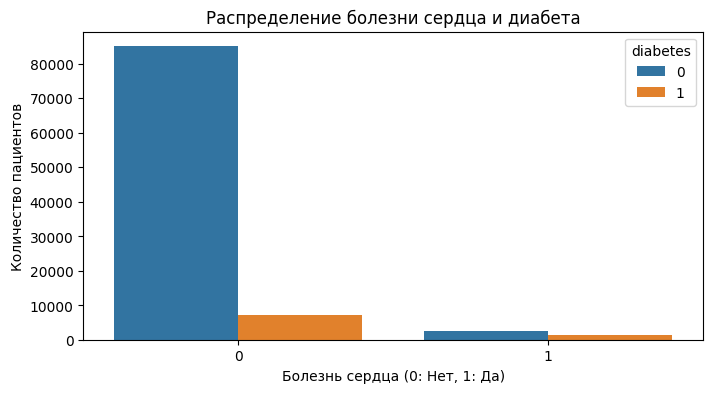

In [46]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_modified, x='heart_disease', hue='diabetes')
plt.title('Распределение болезни сердца и диабета')
plt.xlabel('Болезнь сердца (0: Нет, 1: Да)')
plt.ylabel('Количество пациентов')
plt.show()

In [29]:
diabetes_rate_no_heart_disease = df_modified[df_modified['heart_disease'] == 0]['diabetes'].mean()
diabetes_rate_with_heart_disease = df_modified[df_modified['heart_disease'] == 1]['diabetes'].mean()
print(f"Доля диабетиков без сердечных заболеваний: {diabetes_rate_no_heart_disease:.4f}")
print(f"Доля диабетиков с сердечными заболеваниями: {diabetes_rate_with_heart_disease:.4f}")

Доля диабетиков без сердечных заболеваний: 0.0782
Доля диабетиков с сердечными заболеваниями: 0.3230


**Вывод:**
- Болезнь сердца - фактор развития диабета

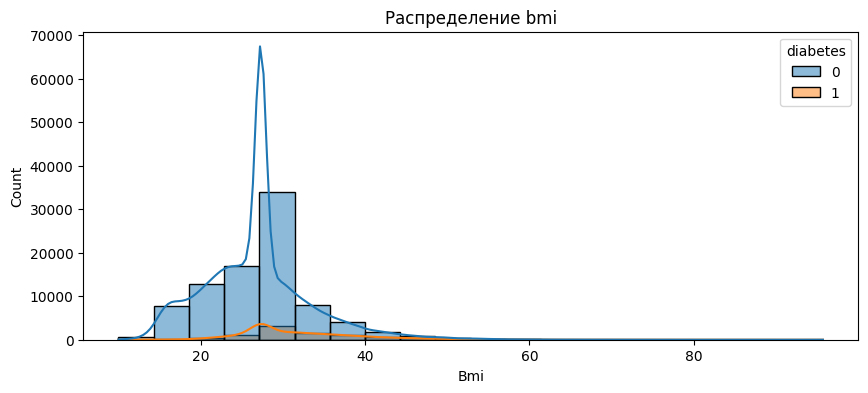

In [32]:
plt.figure(figsize=(10, 4))
sns.histplot(df_modified, x='bmi', bins=20, hue='diabetes', kde=True)
plt.title('Распределение bmi')
plt.xlabel('Bmi')
plt.ylabel('Count')
plt.show()

In [33]:
avg_bmi_no_diabetes = df_modified[df_modified['diabetes'] == 0]['bmi'].mean()
avg_bmi_with_diabetes = df_modified[df_modified['diabetes'] == 1]['bmi'].mean()
print(f"Средний BMI для людей без диабета: {avg_bmi_no_diabetes:.2f}")
print(f"Средний BMI для людей с диабетом: {avg_bmi_with_diabetes:.2f}")

Средний BMI для людей без диабета: 26.87
Средний BMI для людей с диабетом: 32.00


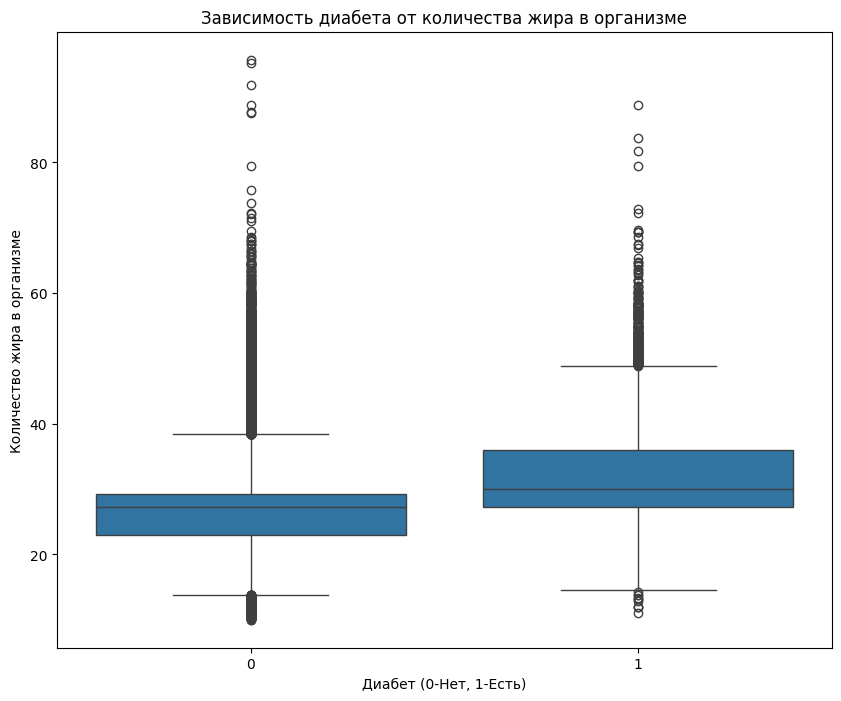

In [38]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_modified, x='diabetes', y='bmi')
plt.title('Зависимость диабета от количества жира в организме')
plt.xlabel('Диабет (0-Нет, 1-Есть)')
plt.ylabel('Количество жира в организме')
plt.show()

**Вывод**
- Люди, болеющие диабетом, в среднем имеют значительно более высокий индекс массы тела (BMI)
- Видно довольно много выбросов вверх, что указывает на наличие людей без диабета, но с очень высоким BMI (левый график), так же много выбросов и для людей с диабетом (правый график)
- Те, кто болеют диабетом, у них ожирение - медианное значение BMI - 30-32

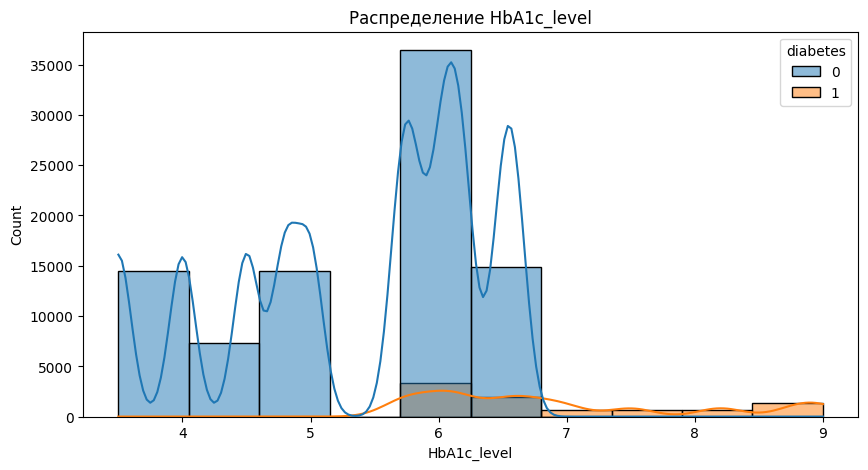

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(df_modified, x='HbA1c_level', bins=10, hue='diabetes', kde=True)
plt.title('Распределение HbA1c_level')
plt.xlabel('HbA1c_level')
plt.ylabel('Count')
plt.show()

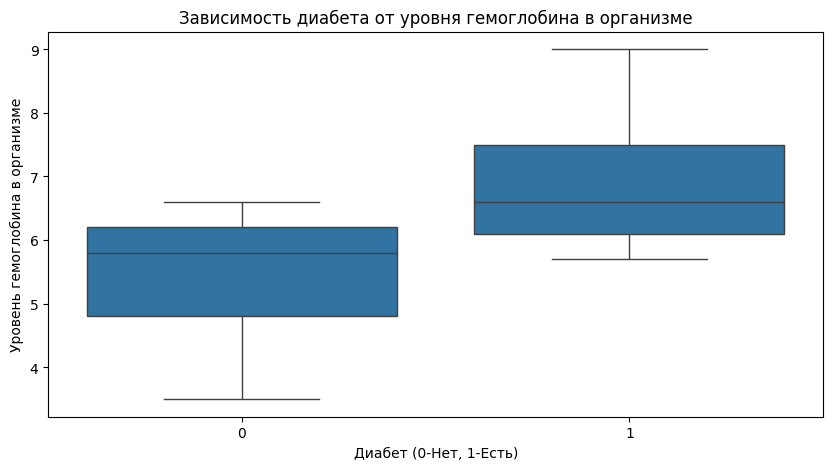

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_modified, x='diabetes', y='HbA1c_level')
plt.title('Зависимость диабета от уровня гемоглобина в организме')
plt.xlabel('Диабет (0-Нет, 1-Есть)')
plt.ylabel('Уровень гемоглобина в организме')
plt.show()

**Вывод:**
- Медианное значения уровня гемоглобина в организме для развития диабета 6.5, уровень HbA1c 6.5% и выше является характерным признаком диабета, с очень высокой долей людей в этой группе, болеющих диабетом.
- Повышенный гемоглобин - фактор развития диабета
- Уровень HbA1c выше 6.0-6.2% значительно повышает вероятность диабета.

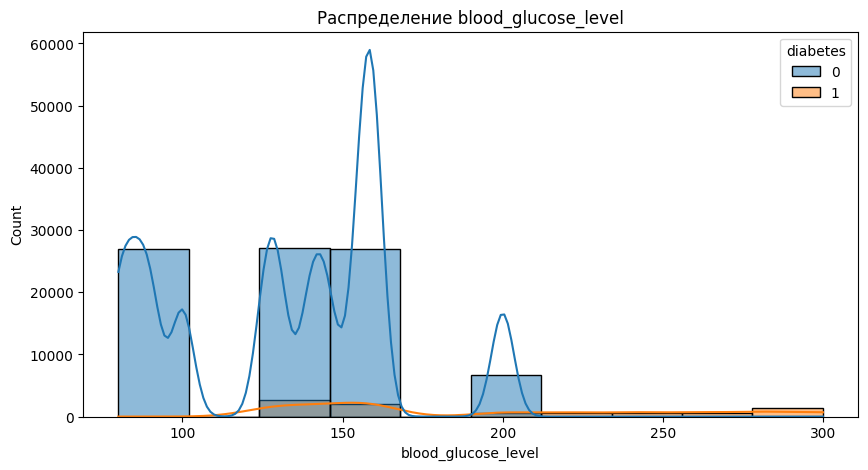

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(df_modified, x='blood_glucose_level', bins=10, hue='diabetes', kde=True)
plt.title('Распределение blood_glucose_level')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count')
plt.show()

**Вывод:**
- Уровень глюкозы от 125 до 175 и более 200 способствует развитию диабета

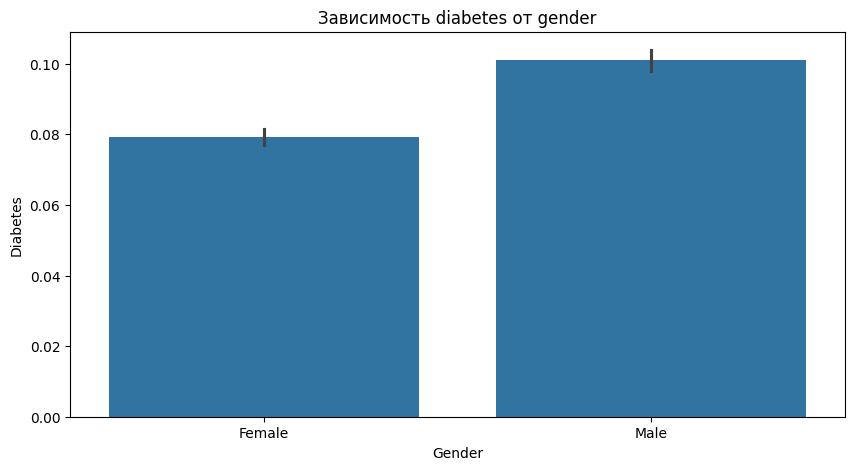

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(df_modified, x='gender', y='diabetes')
plt.title('Зависимость diabetes от gender')
plt.xlabel('Gender')
plt.ylabel('Diabetes')
plt.show()

**Вывод:**
Мужчины чаще болеют диабетом

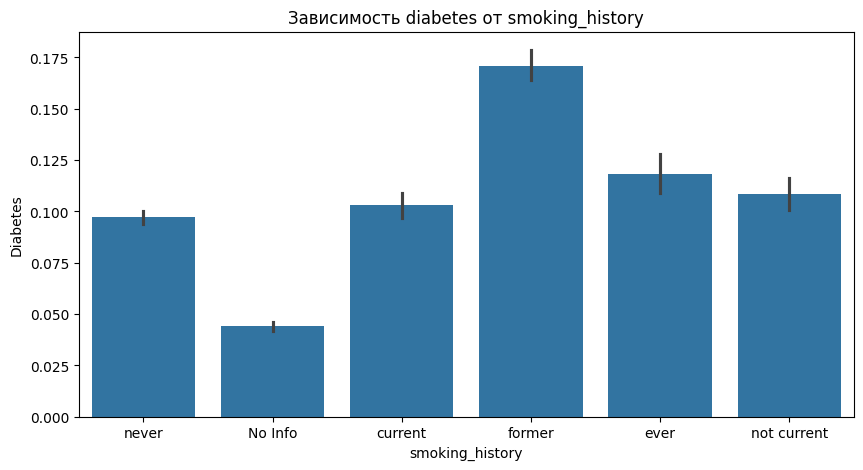

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(df_modified, x='smoking_history', y='diabetes')
plt.title('Зависимость diabetes от smoking_history')
plt.xlabel('smoking_history')
plt.ylabel('Diabetes')
plt.show()

**Вывод:**
- Интересно, что диабетом чаще заболели те, кто бросил курить
- Меньше заболели те, про кого нет информации
- Остальные имеют примерно одинаковую тенденцию к заболеванию диабетом 

### Теперь построим матрицу корреляции 

### Сначала для числовых, а потом для категориальных признаков

In [20]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: >

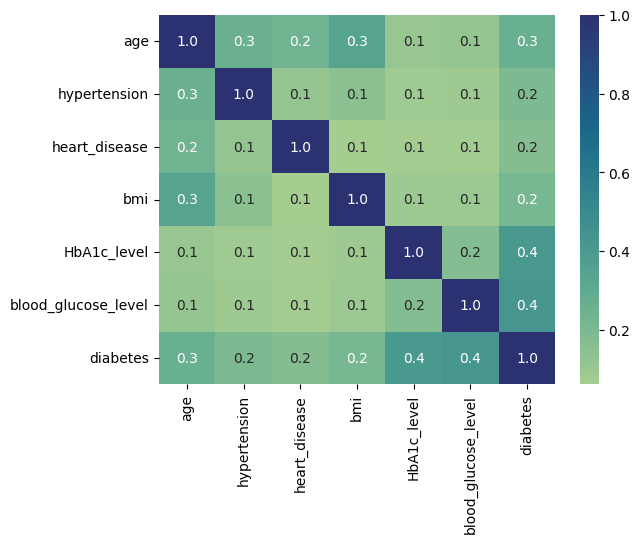

In [21]:
integer_list = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'] 
df_ineger_corr = df_modified[integer_list].corr()
sns.heatmap(df_ineger_corr, annot=True, fmt='.1f', cmap='crest')

**Вывод:**
Не вижу сильной корреляции нашей целевой переменной с каким-либо признаком, максимум с __blood_glucose_level__ и __HbA1c_level__ (всего 0.4)

### Теперь строим корреляционную матрицу для категориальных переменных

<Axes: >

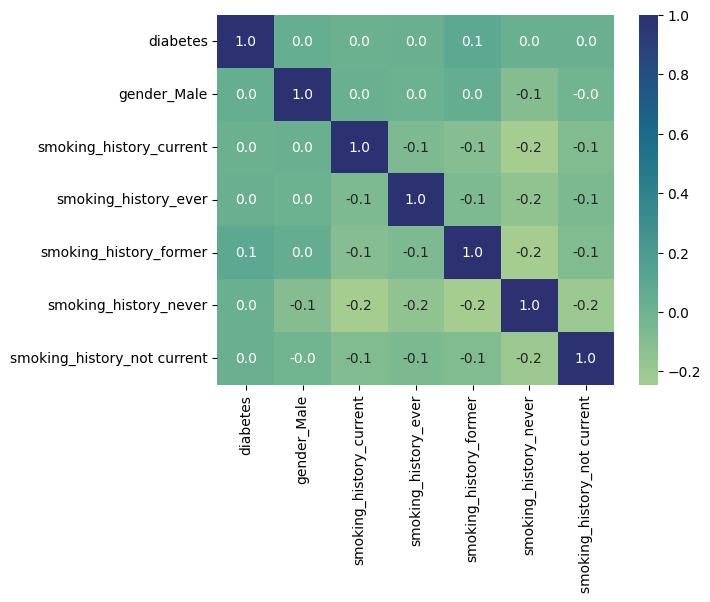

In [22]:
df_cat = df_modified[['gender', 'smoking_history', 'diabetes']]
df_cat = pd.get_dummies(df_cat, drop_first=True).astype(int)
df_cat_corr = df_cat.corr()
sns.heatmap(df_cat_corr, annot=True, fmt='.1f', cmap='crest')

**Вывод:**
Наша целевая переменная ни с чем не коррелирует

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах: